In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [68]:
df = pd.read_csv("iphone_purchase_records.csv")

In [69]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [70]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [71]:
df.isnull().values.any()

np.False_

In [72]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [73]:
encoded_df = pd.get_dummies(df, columns= ["Gender"])

In [74]:
encoded_df.head(15)

,Age,Salary,Purchase Iphone,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
5,27,58000,0,False,True
6,27,84000,0,True,False
7,32,150000,1,True,False
8,25,33000,0,False,True
9,35,65000,0,True,False


In [75]:
X = encoded_df.drop(columns=["Purchase Iphone"])

In [76]:
y = encoded_df["Purchase Iphone"]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [92]:
X.shape

(400, 4)

In [93]:
y.shape

(400,)

In [78]:
x_train.shape

(320, 4)

In [79]:
y_train.shape

(320,)

In [80]:
x_test.shape

(80, 4)

In [81]:
y_test.shape

(80,)

In [82]:
scaler = StandardScaler()

In [83]:
x_train = scaler.fit_transform(x_train)

In [84]:
x_test = scaler.transform(x_test)

In [85]:
model = KNeighborsClassifier()

In [86]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [87]:
y_pred = model.predict(x_test)

In [88]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [89]:
y

,Purchase Iphone
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [104]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.76      0.91      0.83        32

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80

ROC-AUC: 0.8935546874999999


In [91]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    print(f"k={k}, Accuracy={knn.score(x_test, y_test):.2f}")

k=1, Accuracy=0.85
k=2, Accuracy=0.84
k=3, Accuracy=0.86
k=4, Accuracy=0.85
k=5, Accuracy=0.85
k=6, Accuracy=0.86
k=7, Accuracy=0.86
k=8, Accuracy=0.88
k=9, Accuracy=0.88
k=10, Accuracy=0.88


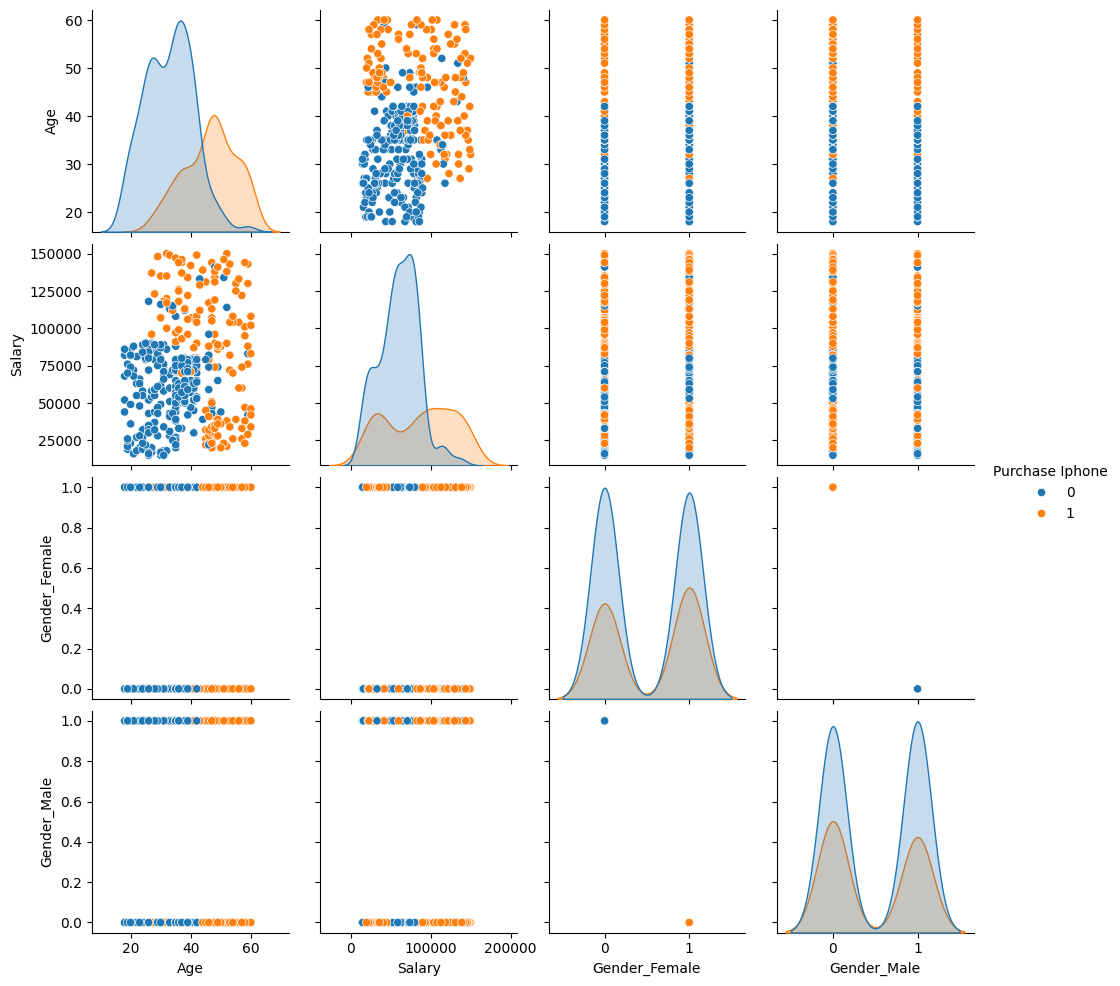

In [102]:

sns.pairplot(encoded_df, hue='Purchase Iphone')
plt.show()

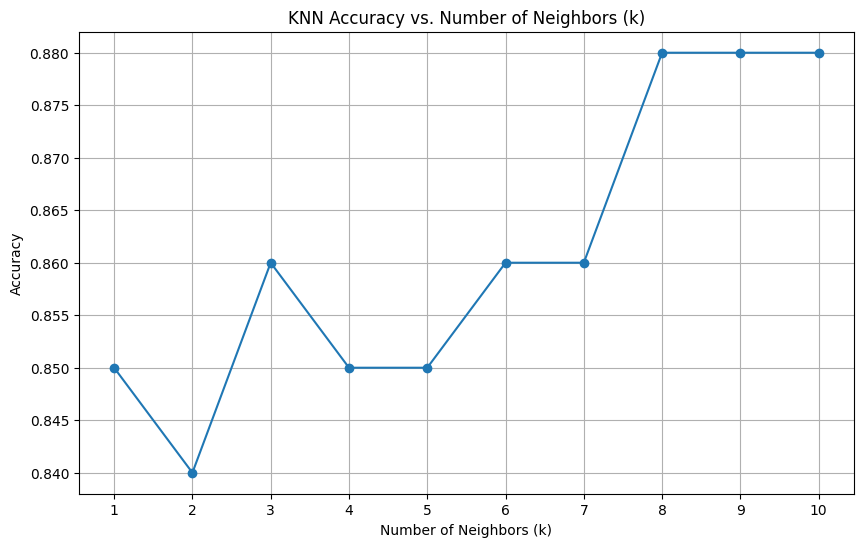

In [99]:
k_values = list(range(1, 11))
accuracy_scores = [0.85, 0.84, 0.86, 0.85, 0.85, 0.86, 0.86, 0.88, 0.88, 0.88] # accuracy score

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()